# libraries

In [1]:
### import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# dataset

In [2]:
covid=pd.read_csv("Covid Data.csv")
covid .head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# EDA- Exploratory data analysis

In [3]:
covid.shape   ##  rows and columns

(1048575, 21)

In [4]:
covid.dtypes   ### check datatypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

# CHECK NULL VALUES

In [5]:
covid.isnull().sum()   ## check null values

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
covid['USMER'].value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

In [7]:
for i in covid.columns:                       ###  all columns unique total value count using for loop
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," => ", dict(covid[i].value_counts()))

USMER  =>  {2: 662903, 1: 385672}
MEDICAL_UNIT  =>  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  =>  {1: 525064, 2: 523511}
PATIENT_TYPE  =>  {1: 848544, 2: 200031}
INTUBED  =>  {97: 848544, 2: 159050, 1: 33656, 99: 7325}
PNEUMONIA  =>  {2: 892534, 1: 140038, 99: 16003}
PREGNANT  =>  {97: 523511, 2: 513179, 1: 8131, 98: 3754}
DIABETES  =>  {2: 920248, 1: 124989, 98: 3338}
COPD  =>  {2: 1030510, 1: 15062, 98: 3003}
ASTHMA  =>  {2: 1014024, 1: 31572, 98: 2979}
INMSUPR  =>  {2: 1031001, 1: 14170, 98: 3404}
HIPERTENSION  =>  {2: 882742, 1: 162729, 98: 3104}
OTHER_DISEASE  =>  {2: 1015490, 1: 28040, 98: 5045}
CARDIOVASCULAR  =>  {2: 1024730, 1: 20769, 98: 3076}
OBESITY  =>  {2: 885727, 1: 159816, 98: 3032}
RENAL_CHRONIC  =>  {2: 1026665, 1: 18904, 98: 3006}
TOBACCO  =>  {2: 960979, 1: 84376, 98: 3220}
CLASIFFICATION_FINAL  =>  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  =>  

In [8]:
med_hist = covid.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
med_hist

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,1,2,2,2,2,2,1,2,2,2,2,2
1,1,97,2,2,2,2,1,2,2,1,1,2
2,2,97,1,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2
4,2,97,1,2,2,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,97,2,2,2,2,2,2,2,2,2,2
1048571,2,97,2,2,2,2,1,2,2,2,2,2
1048572,2,97,2,2,2,2,2,2,2,2,2,2
1048573,2,97,2,2,2,2,2,2,2,2,2,2


In [9]:
covid['PREGNANT'].replace({97 : 2, 98 : 2}, inplace = True)
covid.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX  PREGNANT
1    1             8131
     2           516933
2    2           523511
Name: PREGNANT, dtype: int64

In [10]:
covid['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [11]:
covid['INTUBED'].replace({97 : 2}, inplace = True)

In [12]:
covid = covid.replace([98,99], np.nan)

In [13]:
covid.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                    0
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
dtype: int64

In [14]:
covid.dropna(inplace=True)

In [15]:
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [16]:
for col in med_hist.columns:
    total = len(covid[(covid[col]==1.0) | (covid[col]==2.0)])
    xyz = len(covid[covid[col]==1.0])
    print("Every ", int(np.ceil((xyz/total)*100)), "people in 100 have ", col)

Every  14 people in 100 have  PNEUMONIA
Every  1 people in 100 have  PREGNANT
Every  12 people in 100 have  DIABETES
Every  2 people in 100 have  COPD
Every  3 people in 100 have  ASTHMA
Every  2 people in 100 have  INMSUPR
Every  16 people in 100 have  HIPERTENSION
Every  3 people in 100 have  OTHER_DISEASE
Every  2 people in 100 have  CARDIOVASCULAR
Every  16 people in 100 have  OBESITY
Every  2 people in 100 have  RENAL_CHRONIC
Every  9 people in 100 have  TOBACCO


#  describe- Statistical values

In [17]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06,1.022645e+06
mean,1.642549e+00,8.992715e+00,1.499205e+00,1.185292e+00,1.967761e+00,1.866442e+00,4.185238e+01,1.992345e+00,1.880958e+00,1.986068e+00,1.970263e+00,1.986753e+00,1.844813e+00,1.973573e+00,1.980437e+00,1.847054e+00,1.982161e+00,1.919348e+00,5.293498e+00,7.938119e+01
std,4.792493e-01,3.722897e+00,4.999996e-01,3.885345e-01,1.766342e-01,3.401765e-01,1.671670e+01,8.715546e-02,3.238384e-01,1.172109e-01,1.698599e-01,1.143309e-01,3.620828e-01,1.604002e-01,1.384930e-01,3.599352e-01,1.323662e-01,2.722995e-01,1.889130e+00,3.694466e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [18]:
covid.info()  ## gives information  null value and datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022645 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1022645 non-null  int64  
 1   MEDICAL_UNIT          1022645 non-null  int64  
 2   SEX                   1022645 non-null  int64  
 3   PATIENT_TYPE          1022645 non-null  int64  
 4   DATE_DIED             1022645 non-null  object 
 5   INTUBED               1022645 non-null  float64
 6   PNEUMONIA             1022645 non-null  float64
 7   AGE                   1022645 non-null  float64
 8   PREGNANT              1022645 non-null  int64  
 9   DIABETES              1022645 non-null  float64
 10  COPD                  1022645 non-null  float64
 11  ASTHMA                1022645 non-null  float64
 12  INMSUPR               1022645 non-null  float64
 13  HIPERTENSION          1022645 non-null  float64
 14  OTHER_DISEASE         1022645 non-

In [19]:
covid.median()

USMER                    2.0
MEDICAL_UNIT            12.0
SEX                      1.0
PATIENT_TYPE             1.0
INTUBED                  2.0
PNEUMONIA                2.0
AGE                     40.0
PREGNANT                 2.0
DIABETES                 2.0
COPD                     2.0
ASTHMA                   2.0
INMSUPR                  2.0
HIPERTENSION             2.0
OTHER_DISEASE            2.0
CARDIOVASCULAR           2.0
OBESITY                  2.0
RENAL_CHRONIC            2.0
TOBACCO                  2.0
CLASIFFICATION_FINAL     6.0
ICU                     97.0
dtype: float64

In [20]:
covid.std()   ## standard deviation

USMER                    0.479249
MEDICAL_UNIT             3.722897
SEX                      0.500000
PATIENT_TYPE             0.388535
INTUBED                  0.176634
PNEUMONIA                0.340177
AGE                     16.716698
PREGNANT                 0.087155
DIABETES                 0.323838
COPD                     0.117211
ASTHMA                   0.169860
INMSUPR                  0.114331
HIPERTENSION             0.362083
OTHER_DISEASE            0.160400
CARDIOVASCULAR           0.138493
OBESITY                  0.359935
RENAL_CHRONIC            0.132366
TOBACCO                  0.272300
CLASIFFICATION_FINAL     1.889130
ICU                     36.944661
dtype: float64

In [21]:
covid.var() ## variance

USMER                      0.229680
MEDICAL_UNIT              13.859961
SEX                        0.250000
PATIENT_TYPE               0.150959
INTUBED                    0.031200
PNEUMONIA                  0.115720
AGE                      279.447986
PREGNANT                   0.007596
DIABETES                   0.104871
COPD                       0.013738
ASTHMA                     0.028852
INMSUPR                    0.013072
HIPERTENSION               0.131104
OTHER_DISEASE              0.025728
CARDIOVASCULAR             0.019180
OBESITY                    0.129553
RENAL_CHRONIC              0.017521
TOBACCO                    0.074147
CLASIFFICATION_FINAL       3.568810
ICU                     1364.907987
dtype: float64

In [22]:
covid.ndim  ## check dimension

2

In [23]:
type(covid)

pandas.core.frame.DataFrame

In [24]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [25]:
covid.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,97.0


# DATA visualization

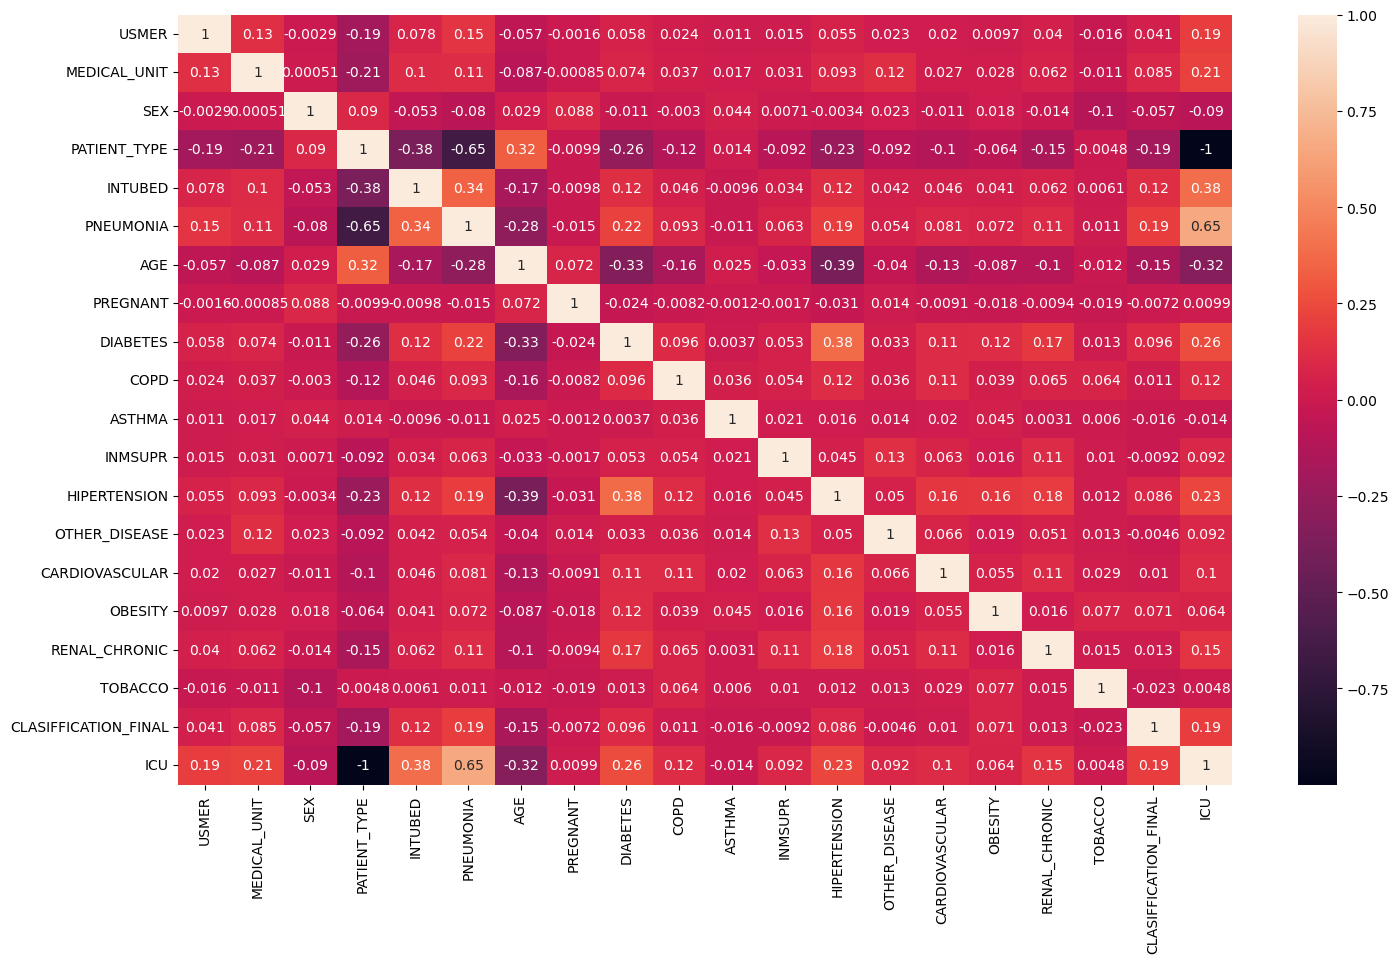

In [26]:
fig,axes=plt.subplots(figsize=(17,10))
sns.heatmap(covid.corr(),annot=True)
plt.show()

In [27]:
covid['DEAD'] = [2 if i=='9999-99-99' else 1 for i in covid.DATE_DIED]

In [28]:
covid["DEAD"].value_counts()    

2    949330
1     73315
Name: DEAD, dtype: int64

In [29]:
covid.drop(columns=["DATE_DIED"],inplace=True)

In [30]:
covid.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2.0,1.0,65.0,2,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,97.0,1
1,2,1,2,1,2.0,1.0,72.0,2,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,97.0,1


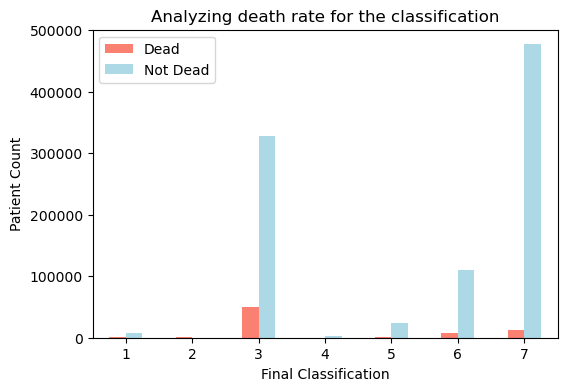

In [31]:
pd.crosstab(covid.CLASIFFICATION_FINAL, covid.DEAD).plot(kind="bar", figsize=(6,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);


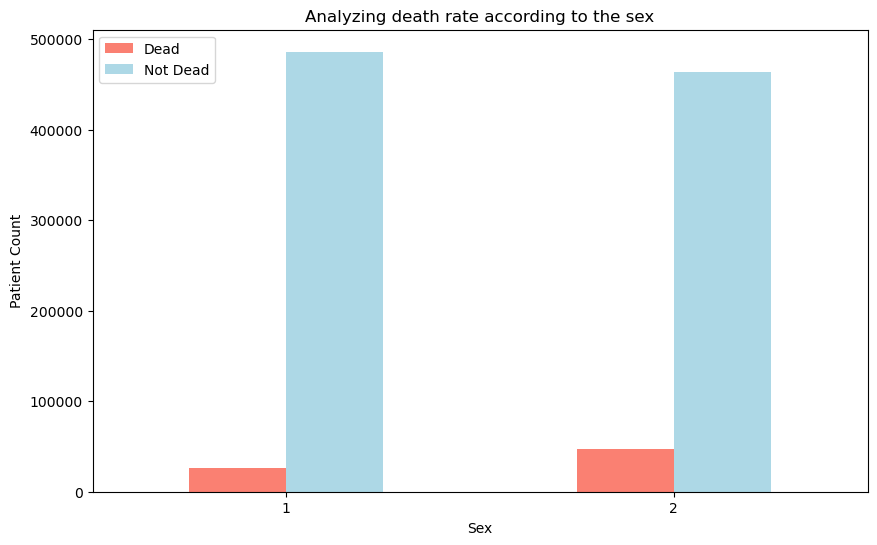

In [32]:
pd.crosstab(covid.SEX, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

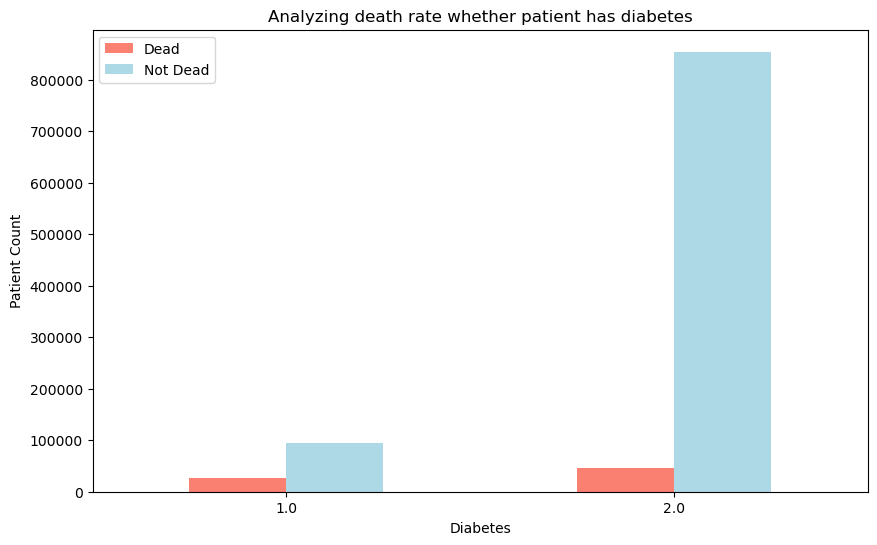

In [33]:
pd.crosstab(covid.DIABETES, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

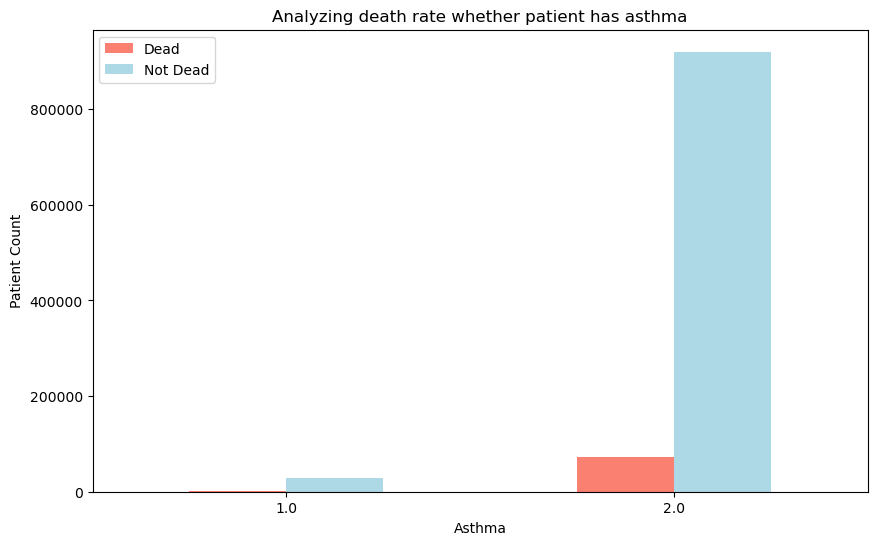

In [34]:
pd.crosstab(covid.ASTHMA, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has asthma")
plt.xlabel("Asthma")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

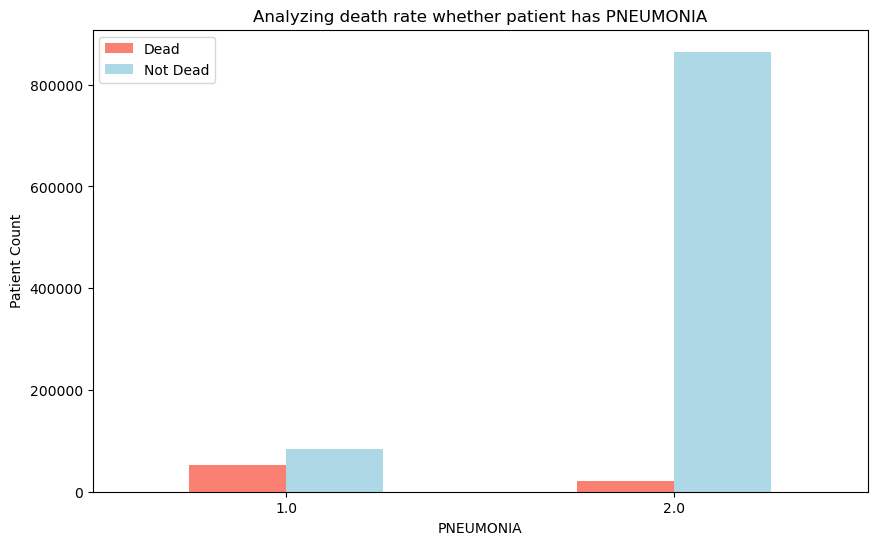

In [35]:
pd.crosstab(covid.PNEUMONIA, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel("PNEUMONIA")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

In [36]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

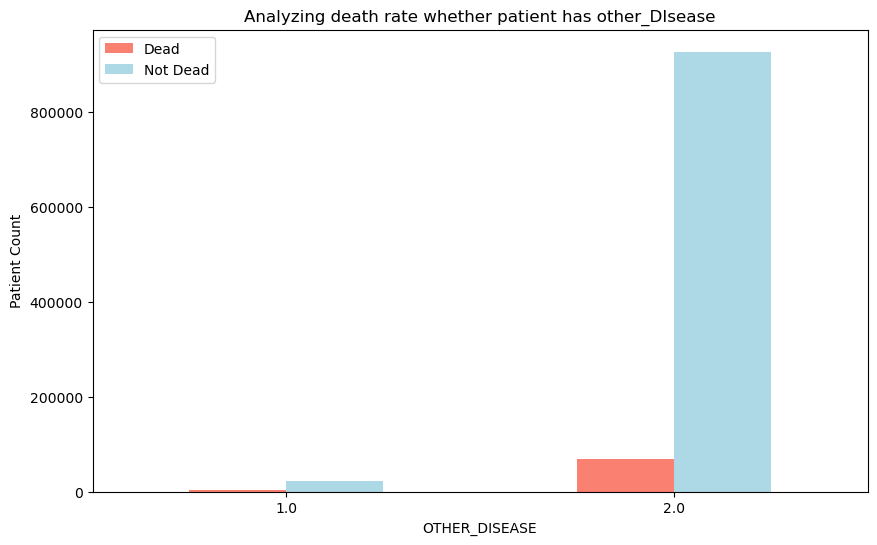

In [37]:
pd.crosstab(covid.OTHER_DISEASE, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has other_DIsease")
plt.xlabel("OTHER_DISEASE")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

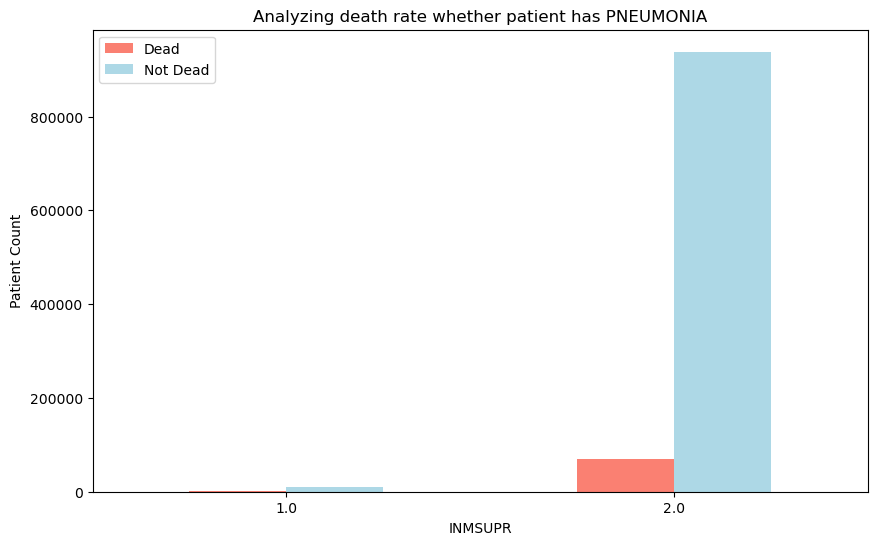

In [38]:
pd.crosstab(covid.INMSUPR, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel("INMSUPR")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

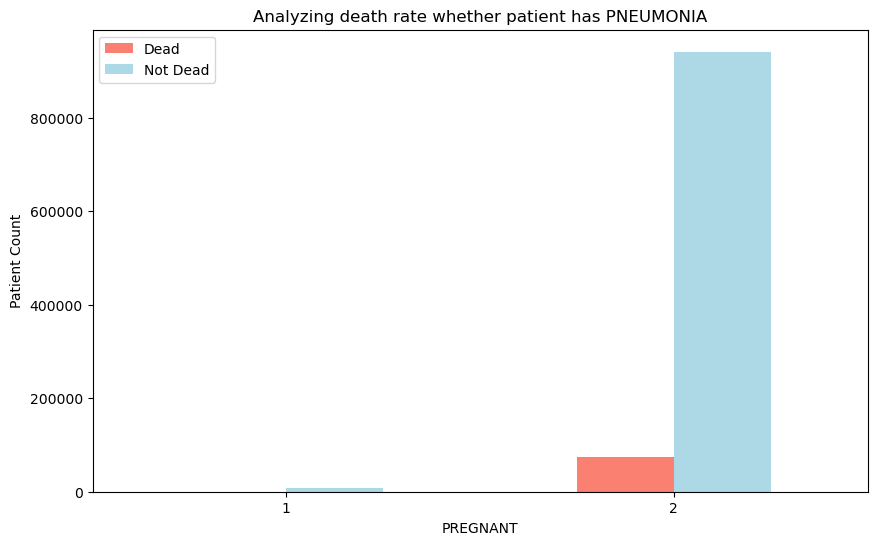

In [39]:
pd.crosstab(covid.PREGNANT, covid.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel("PREGNANT")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

<AxesSubplot:xlabel='DEAD', ylabel='count'>

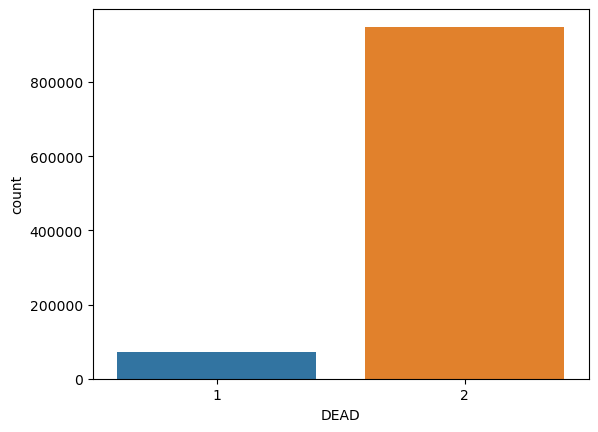

In [40]:
sns.countplot(covid['DEAD'])

In [41]:
dead=covid[covid.DEAD==1]
NOT_dead=covid[covid.DEAD==2]

In [42]:
dead.shape

(73315, 21)

In [43]:
NOT_dead.shape

(949330, 21)

In [44]:
covid.groupby("DEAD").mean()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
DEAD,,,,,,,,,,,,,,,,,,,,
1,1.439637,6.915802,1.643934,1.909023,1.646757,1.289368,61.125063,1.998909,1.629462,1.948305,1.981013,1.966255,1.580127,1.940517,1.942467,1.775203,1.925213,1.913783,3.971275,10.534488
2,1.658220,9.153111,1.488028,1.129400,1.992552,1.911009,40.363983,1.991838,1.900380,1.988984,1.969433,1.988336,1.865254,1.976126,1.983369,1.852603,1.986559,1.919778,5.395611,84.698093


In [45]:
not_dead_sample=NOT_dead.sample(n=73315)

In [46]:
new_covid=pd.concat([not_dead_sample,dead],axis=0)

<AxesSubplot:xlabel='DEAD', ylabel='count'>

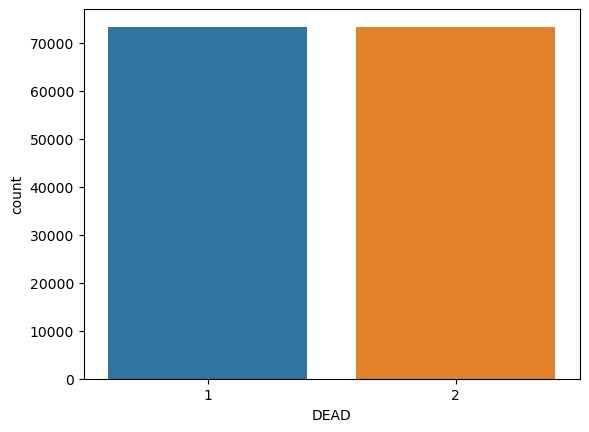

In [47]:
sns.countplot(new_covid['DEAD'])

# spliting data into test and train

In [48]:
x=new_covid.iloc[:,0:20]  ## x= independent variable 
y=new_covid.iloc[:,20:]    ## y= dependent variable

In [49]:
from sklearn.model_selection import train_test_split as tts

In [50]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)    ## split ratio train:test  =  70:30

#  ML algorithms   1) LOGISTIC REGRESSION

In [63]:
lg_model= LogisticRegression()

In [64]:
lg_model.fit(xtrain,ytrain)

LogisticRegression()

In [65]:
prediction=lg_model.predict(xtest)

# Accuracy_score

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy=accuracy_score(prediction,ytest)

In [68]:
accuracy

0.9068176134942827

# confusion_matrix

In [69]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,prediction)
cm

array([[20094,  1817],
       [ 2282, 19796]], dtype=int64)

<AxesSubplot:>

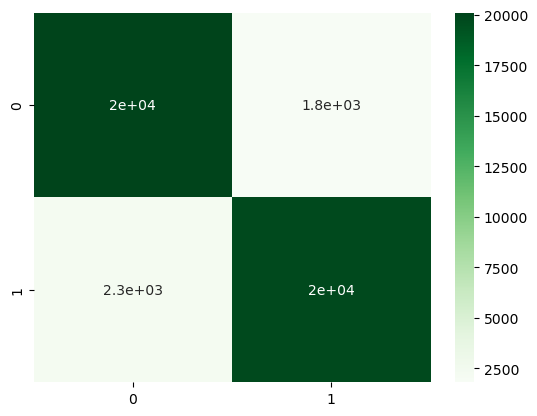

In [70]:
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")

In [71]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [72]:
precision = precision_score(ytest,prediction)
precision

0.8980157311405077

In [73]:
recall = recall_score(ytest,prediction)
recall

0.9170736159919675

In [74]:
f1 = f1_score(ytest,prediction)
f1

0.9074446225754736

# 2) RANDOMFORESTCLASSIFIER  

In [75]:
rf_model = RandomForestClassifier(n_estimators=20,random_state=10,max_depth=6,criterion="entropy")

In [76]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=20,
                       random_state=10)

In [77]:
prediction=rf_model.predict(xtest)

In [78]:
accuracy=accuracy_score(prediction,ytest)

In [79]:
accuracy

0.9079087953806634

In [80]:
cm=confusion_matrix(ytest,prediction)
cm

array([[20758,  1153],
       [ 2898, 19180]], dtype=int64)

<AxesSubplot:>

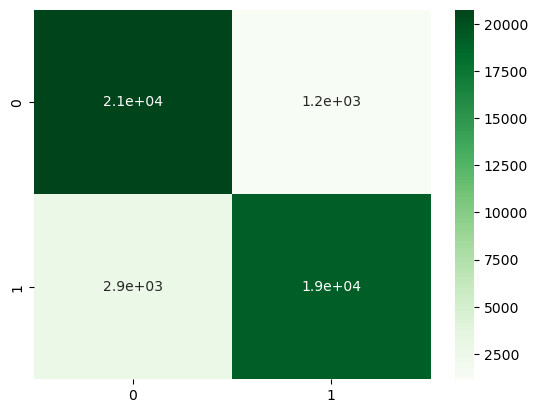

In [81]:
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")

In [82]:
precision = precision_score(ytest,prediction)
precision

0.8774940818397025

In [83]:
recall = recall_score(ytest,prediction)
recall

0.9473780293003514

In [84]:
f1 = f1_score(ytest,prediction)
f1

0.9110979436873176

#  DECISIONTREE  using Gini index

In [85]:
dt= DecisionTreeClassifier(criterion='gini',max_depth=5)

In [86]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [87]:
prd=dt.predict(xtest)
prd

array([1, 1, 2, ..., 1, 2, 1], dtype=int64)

In [88]:
accuracy=accuracy_score(prd,ytest)

In [89]:
accuracy

0.9101820909772897

In [90]:
cm=confusion_matrix(ytest,prediction)
cm

array([[20758,  1153],
       [ 2898, 19180]], dtype=int64)

<AxesSubplot:>

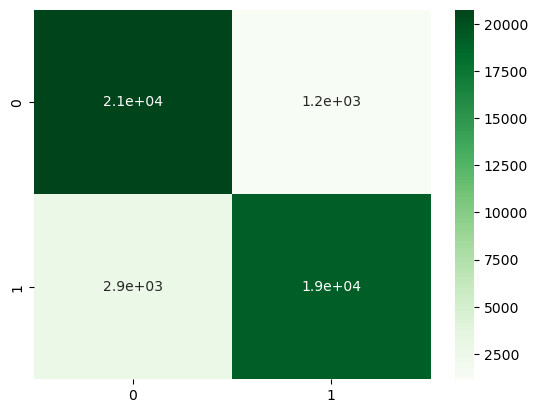

In [91]:
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")

In [92]:
precision = precision_score(ytest,prediction)
precision

0.8774940818397025

In [93]:
recall = recall_score(ytest,prediction)
recall

0.9473780293003514

In [94]:
f1 = f1_score(ytest,prediction)
f1

0.9110979436873176

In [95]:
dt_entro= DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [96]:
dt_entro.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [97]:
prd=dt_entro.predict(xtest)
prd

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [98]:
accuracy=accuracy_score(prd,ytest)

In [99]:
accuracy

0.9073859373934393

In [100]:
cm=confusion_matrix(ytest,prediction)
cm

array([[20758,  1153],
       [ 2898, 19180]], dtype=int64)

<AxesSubplot:>

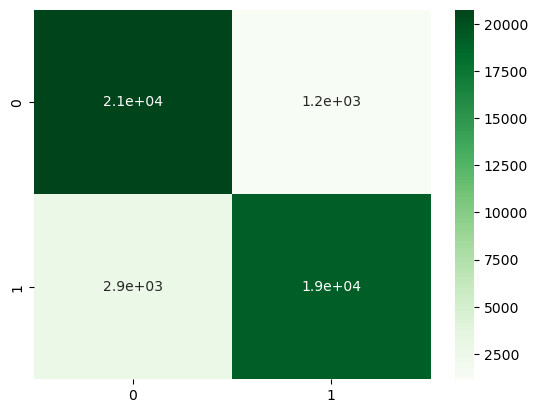

In [101]:
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")

In [102]:
precision = precision_score(ytest,prediction)
precision

0.8774940818397025

In [103]:
recall = recall_score(ytest,prediction)
recall

0.9473780293003514

In [104]:
f1 = f1_score(ytest,prediction)
f1

0.9110979436873176

In [105]:
from sklearn import tree

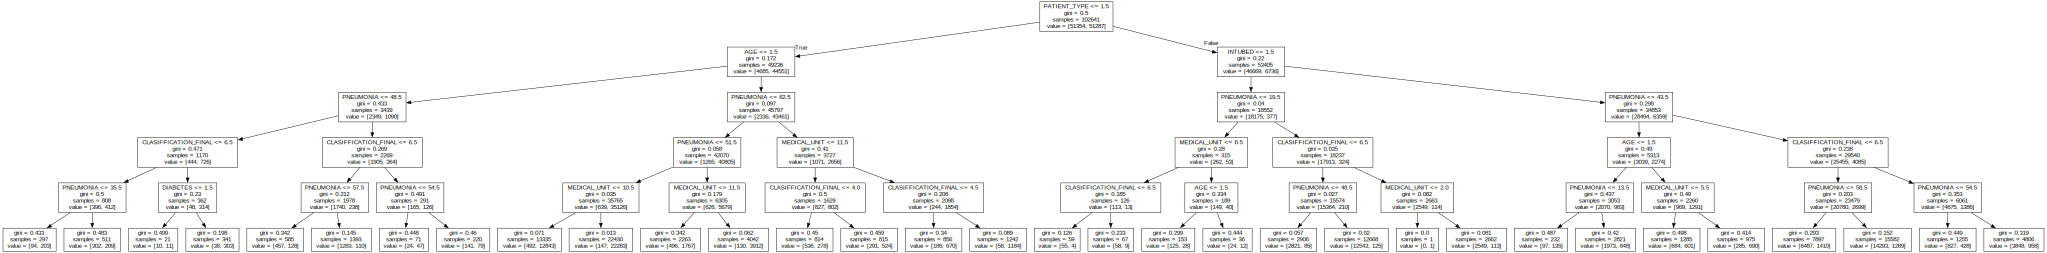

In [95]:
dfn= ['USMER', 'MEDICAL_UNIT',"SEX","PATIENT_TYPE","INTUBED","AGE",'PNEUMONIA',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(dt,feature_names=dfn))
display(SVG(graph.pipe(format="svg")))

# NAIVE BAYES

In [96]:
from sklearn .naive_bayes import GaussianNB

In [97]:
model=GaussianNB()
model.fit(xtrain,ytrain)
prd=model.predict(xtest)
prd


array([1, 2, 2, ..., 2, 1, 2], dtype=int64)

In [98]:
accuracy=accuracy_score(prd,ytest)
accuracy

0.8859942258291845

In [99]:
cm=confusion_matrix(ytest,prediction)
cm

array([[20745,  1216],
       [ 2815, 19213]], dtype=int64)

<AxesSubplot:>

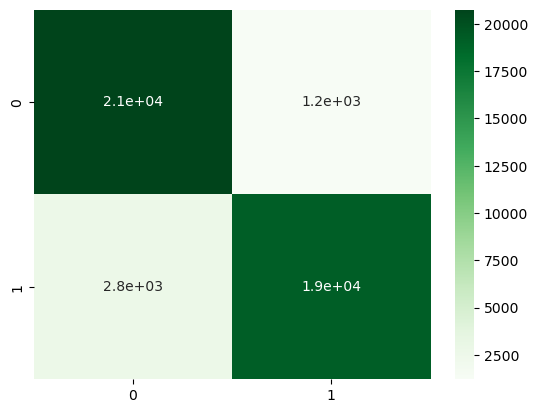

In [100]:
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")

In [101]:
precision = precision_score(ytest,prediction)
precision

0.8805178268251274

# KNN using eculiean

In [102]:
my_dict={}
for K in range(1,30):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")

In [103]:
model_KNN.fit(xtrain, ytrain)
Y_pred = model_KNN.predict(xtest)
print ("Accuracy is ", accuracy_score(ytest,Y_pred), "for K-Value:",K)
my_dict[K]=accuracy_score(ytest,Y_pred)

Accuracy is  0.9092955056946055 for K-Value: 29


In [105]:
cm=confusion_matrix(ytest,Y_pred)
cm

array([[20578,  1383],
       [ 2607, 19421]], dtype=int64)

<AxesSubplot:>

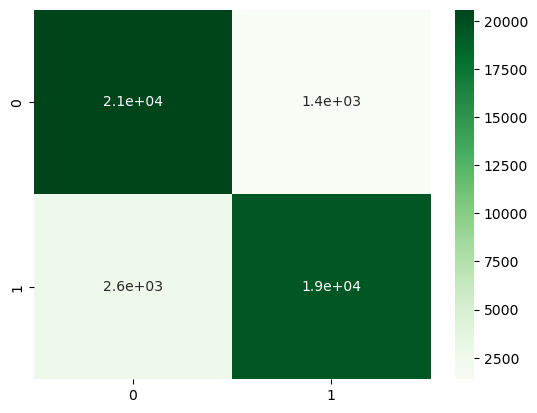

In [106]:
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")

In [107]:
precision = precision_score(ytest,Y_pred)
precision

0.8875566098770757

In [108]:
recall = recall_score(ytest,prediction)
recall

0.9446291152497609

In [109]:
f1 = f1_score(ytest,prediction)
f1

0.9114474638079127

In [111]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

In [62]:
print("if a person is alive or not")
USMER=int(input("enter the usmer:"))
MEDICAL_UNIT=int(input("enter the medical_value:"))
SEX=int(input("enter the sex")) ### 1 means female 2 means male
PATIENT_TYPE=int(input("enter the patient_type"))  ## 1 means home 2 means hpospital
INTUBED=int(input("enter the intubed:"))
PREGNANT=int(input("if she is pregnant  or not:"))   ## 1 means yes and 2 means no
PNEUMONIA=int(input("if a person has pnemonia or not:"))   ## 1 means yes and 2 means no
DIABETES=int(input("if a person has diabetes or not:"))## 1 means yes and 2 means no 
COPD=int(input("if a person has COPD or not:"))
AGE=int(input("enter the age"))
ASTHMA=int(input("if a person has asthma or not:"))
INMSUPR=int(input("if a person has INMSUPR or not:"))
HIPERTENSION=int(input("if a person has HIPERTENSION or not:"))
OTHER_DISEASE=int(input("if a person has other_disease or not:"))
CARDIOVASCULAR=int(input("if a person has cardiovascular or not:"))
OBESITY=int(input("if a person has obesity or not:"))
RENAL_CHRONIC=int(input("if a person has renal_chronic or not:"))
TOBACCO=int(input("if a person consume tobacco or not:"))
CLASIFFICATION_FINAL=int(input("if a person is serious or not:"))
ICU=int(input("if a person is in icu or not:"))
prediction=dt.predict([[USMER, MEDICAL_UNIT, SEX, PATIENT_TYPE, INTUBED, PNEUMONIA,
       AGE, PREGNANT, DIABETES, COPD, ASTHMA, INMSUPR,
       HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY,
       RENAL_CHRONIC, TOBACCO, CLASIFFICATION_FINAL, ICU]])
print(prediction)
if prediction==1:
    print("A person is died")
else:
    print("A person is alive")







if a person is alive or not
enter the usmer:2
enter the medical_value:12
enter the sex1
enter the patient_type1
enter the intubed:1
if she is pregnant  or not:1
if a person has pnemonia or not:1
if a person has diabetes or not:2
if a person has COPD or not:2
enter the age72
if a person has asthma or not:1
if a person has INMSUPR or not:2
if a person has HIPERTENSION or not:2
if a person has other_disease or not:1
if a person has cardiovascular or not:1
if a person has obesity or not:1
if a person has renal_chronic or not:1
if a person consume tobacco or not:1
if a person is serious or not:1
if a person is in icu or not:2
[1]
A person is died
